# OpenET PTJPL
## Image Class Property/Method Example
This example shows how to instantiate the model Image class for a single Landsat image using the ".from_landsat_c2_sr()" helper method.  This example also shows how to get the model variables.

## Setup

### Install Earth Engine

In [1]:
# Import the Earth Engine package, installing it first, if needed.
try:
    import ee
except ModuleNotFoundError:
    !pip install earthengine-api
    import ee

### Install PTJPL

In [2]:
# Import the PTJPL package, installing it first, if needed.
try:
    import openet.ptjpl as model
except ModuleNotFoundError:
    !pip install openet-ptjpl
    import openet.ptjpl as model

### Package Imports

In [3]:
import pprint

from IPython.display import Image

### Initialize Earth Engine

In [4]:
# Initialize the Earth Engine package, initiating the authentication flow if needed.
try:
    ee.Initialize()
except ee.EEException:
    ee.Authenticate()
    ee.Initialize()

## Analysis

In [5]:
ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
    'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
    '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']
viridis_palette = ['440154', '433982', '30678D', '218F8B', '36B677', '8ED542', 'FDE725']

image_size = 768

### Landsat 8 Collection 2 SR Image

In [6]:
landsat_img = ee.Image('LANDSAT/LC08/C02/T1_L2/LC08_039031_20200806')
# landsat_img = ee.Image('LANDSAT/LE07/C02/T1_L2/LE07_040035_20201008')


crs = landsat_img.select('SR_B3').projection().getInfo()['crs']
region = landsat_img.geometry().bounds(1, 'EPSG:4326')
date = ee.Date(landsat_img.get('system:time_start'))
# print(landsat_img.get('system:time_start').getInfo())

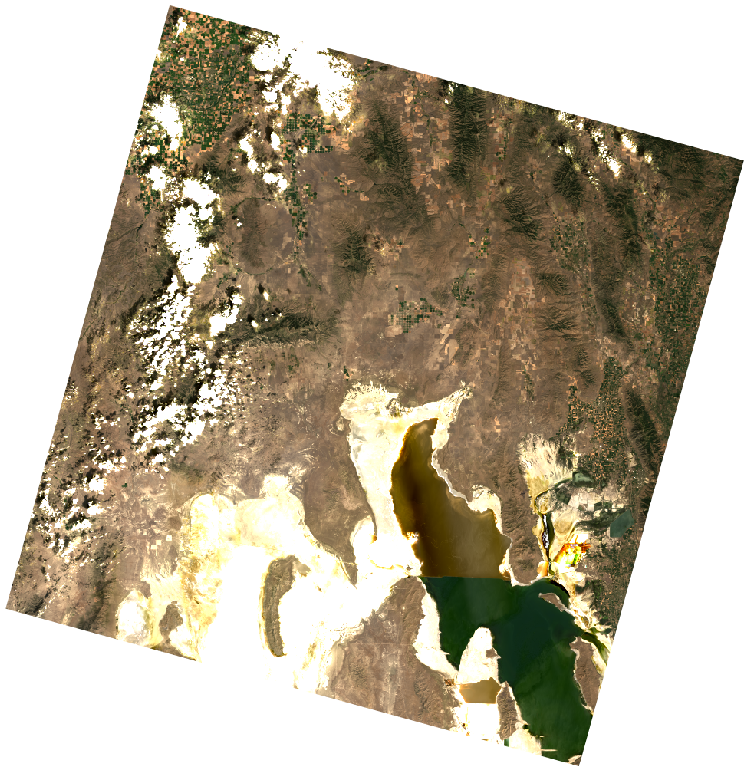

In [7]:
image_url = (
    landsat_img.select(['SR_B4', 'SR_B3', 'SR_B2'])
    .multiply([0.0000275, 0.0000275, 0.0000275]).add([-0.2, -0.2, -0.2])
    .getThumbURL({'min': 0.0, 'max': 0.3, 'region': region, 'dimensions': image_size})
)
Image(image_url, embed=True, format='png')

In [8]:
# Build the PTJPL object from the Landsat image
model_obj = model.Image.from_landsat_c2_sr(
    landsat_img, 
    et_reference_source='IDAHO_EPSCOR/GRIDMET',
    et_reference_band='etr',
    et_reference_factor=1.0,
    et_reference_resample='bilinear',
)

### NDVI

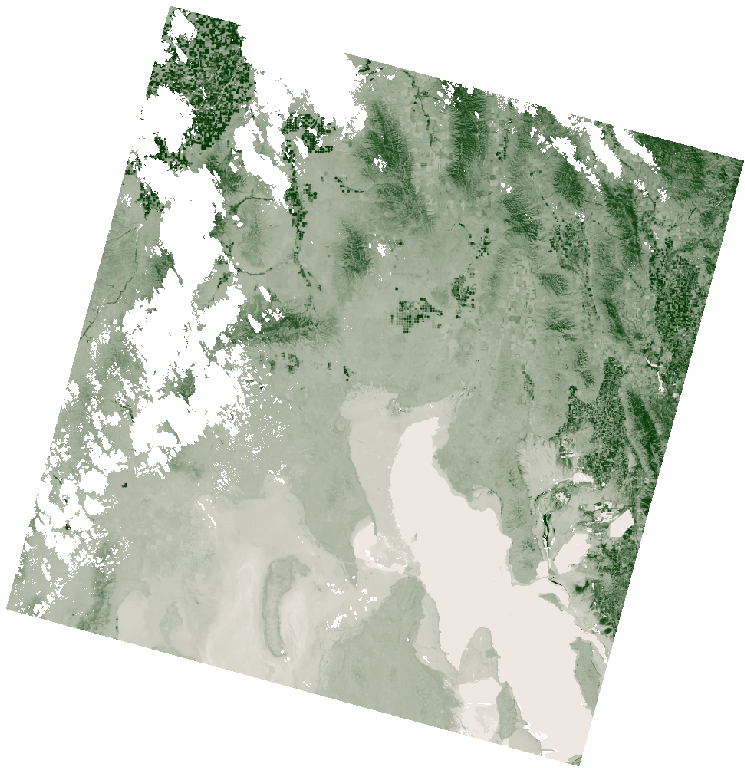

In [9]:
image_url = model_obj.NDVI\
    .getThumbURL({'min': -0.1, 'max': 0.9, 'palette': ndvi_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

In [10]:
# image_url = model_obj.NDVI\
#     .getThumbURL({'min': -0.9, 'max': 0.9, 'palette': ['red', 'yellow', 'blue'], 'region': region, 'dimensions': image_size})
# Image(image_url, embed=True, format='png')

### Water Mask

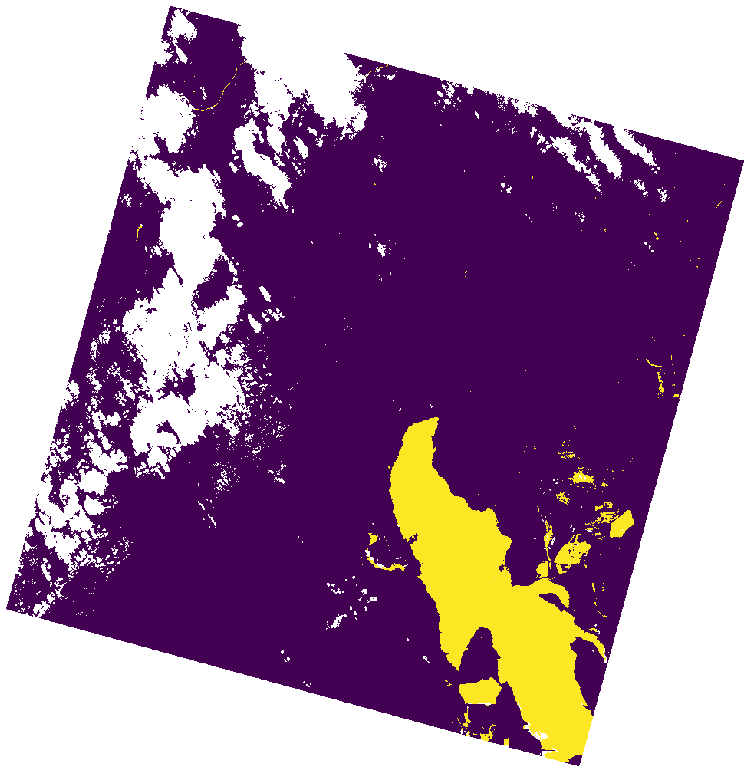

In [11]:
image_url = model_obj.water_mask\
    .getThumbURL({'min': 0, 'max': 1, 'palette': viridis_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### Albedo

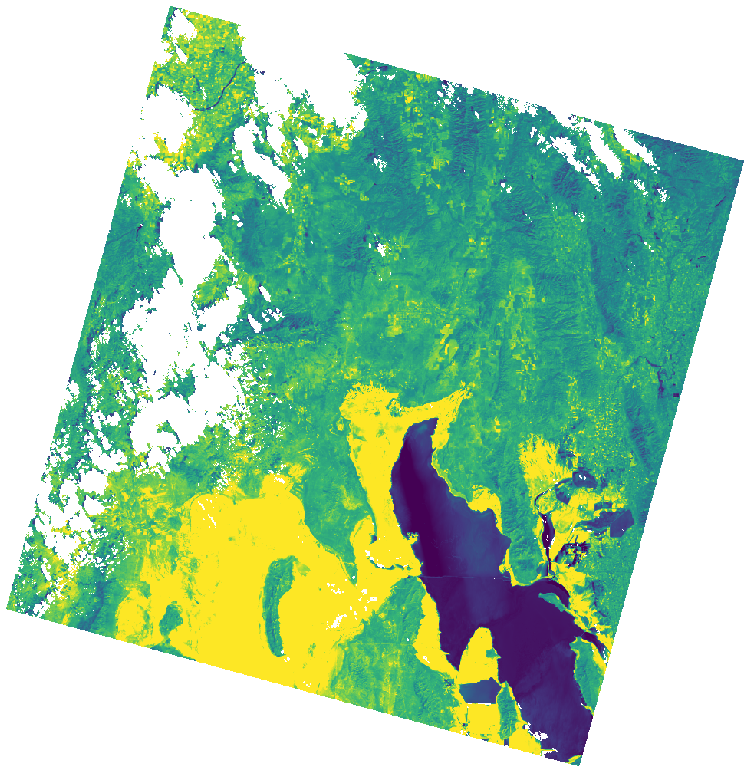

In [12]:
image_url = model_obj.albedo\
    .getThumbURL({'min': 0.0, 'max': 0.3, 'palette': viridis_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### ET fraction

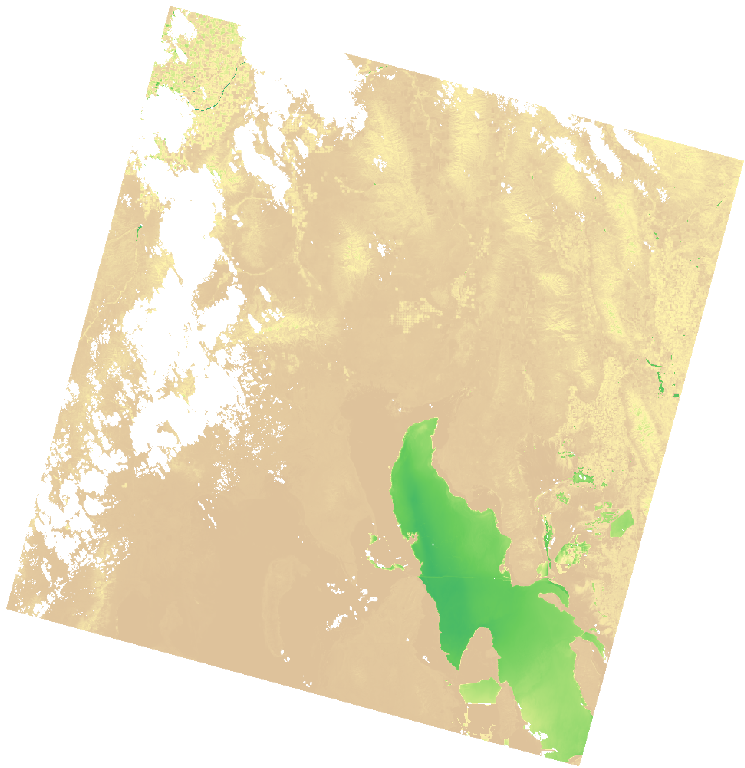

In [13]:
image_url = model_obj.et_fraction\
    .getThumbURL({'min': 0.0, 'max': 1.2, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### Reference ET

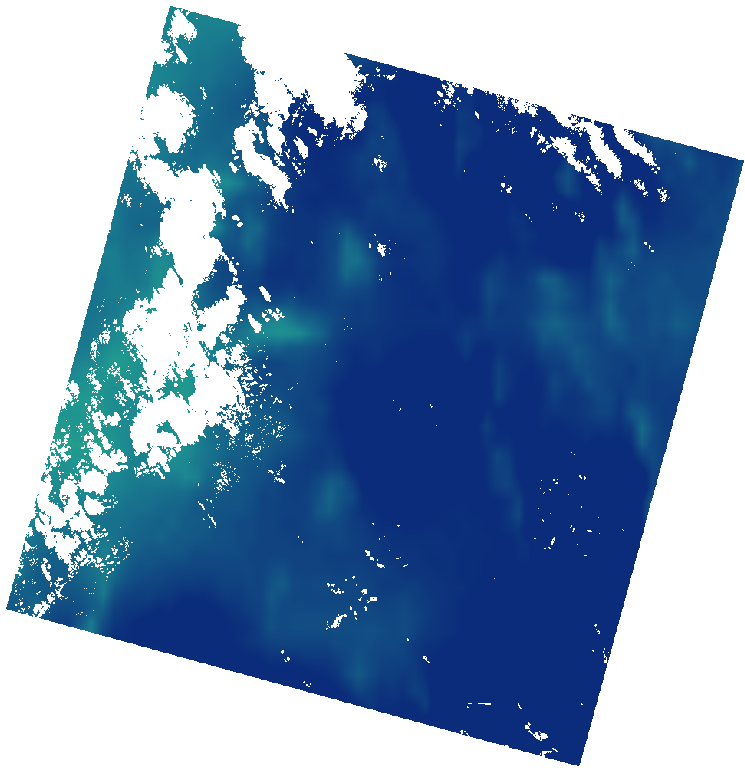

In [14]:
# Clip and project to the Landsat image footprint and coordinate system
image_url = model_obj.et_reference\
    .getThumbURL({'min': 0.0, 'max': 12, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### ET

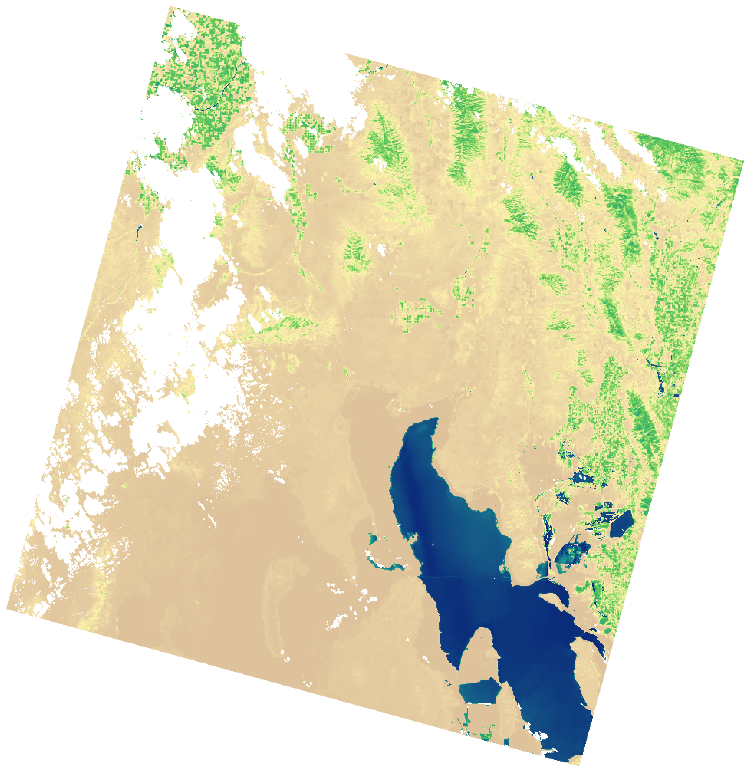

In [15]:
image_url = model_obj.et\
    .getThumbURL({'min': 0.0, 'max': 8, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')

### "Calculate" Method

Return a multiband image of the model variables

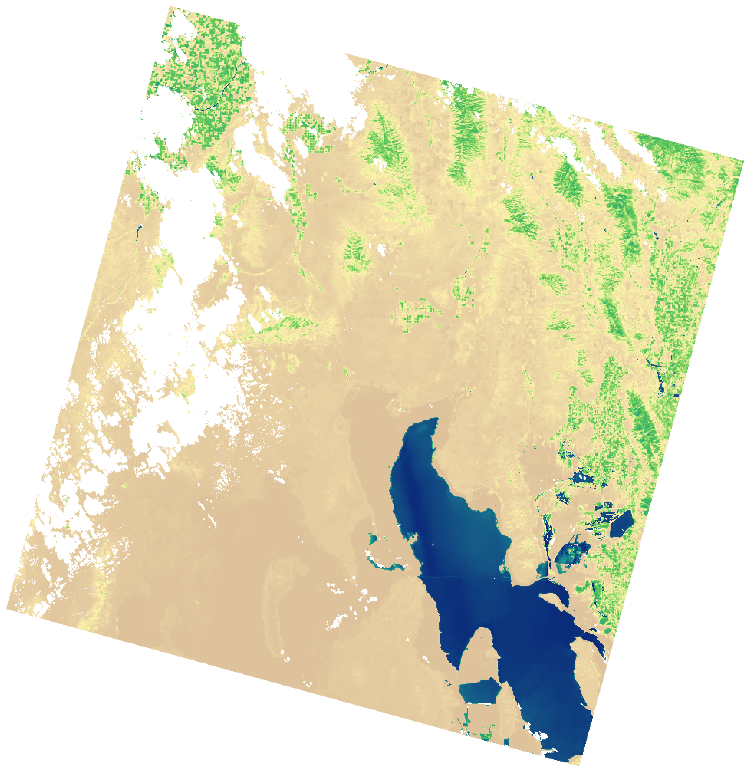

In [16]:
image_url = model_obj.calculate(['et', 'et_reference', 'et_fraction']).select(['et'])\
    .getThumbURL({'min': 0.0, 'max': 8, 'palette': et_palette, 'region': region, 'dimensions': image_size})
Image(image_url, embed=True, format='png')